In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorboard as tb

2023-05-09 13:01:04.361369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-09 13:01:04.361402: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


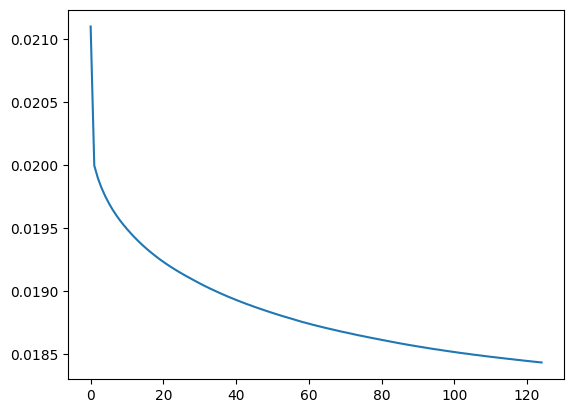

In [3]:
from tbparse import SummaryReader
log_dir = "/home/jchishol/TRecNet/tensorboard_logs/fit/TRecNet_6jets_20230411_161458/train"
tensors = SummaryReader(log_dir,pivot=True).tensors
plt.plot(tensors["step"],tensors["epoch_loss"])

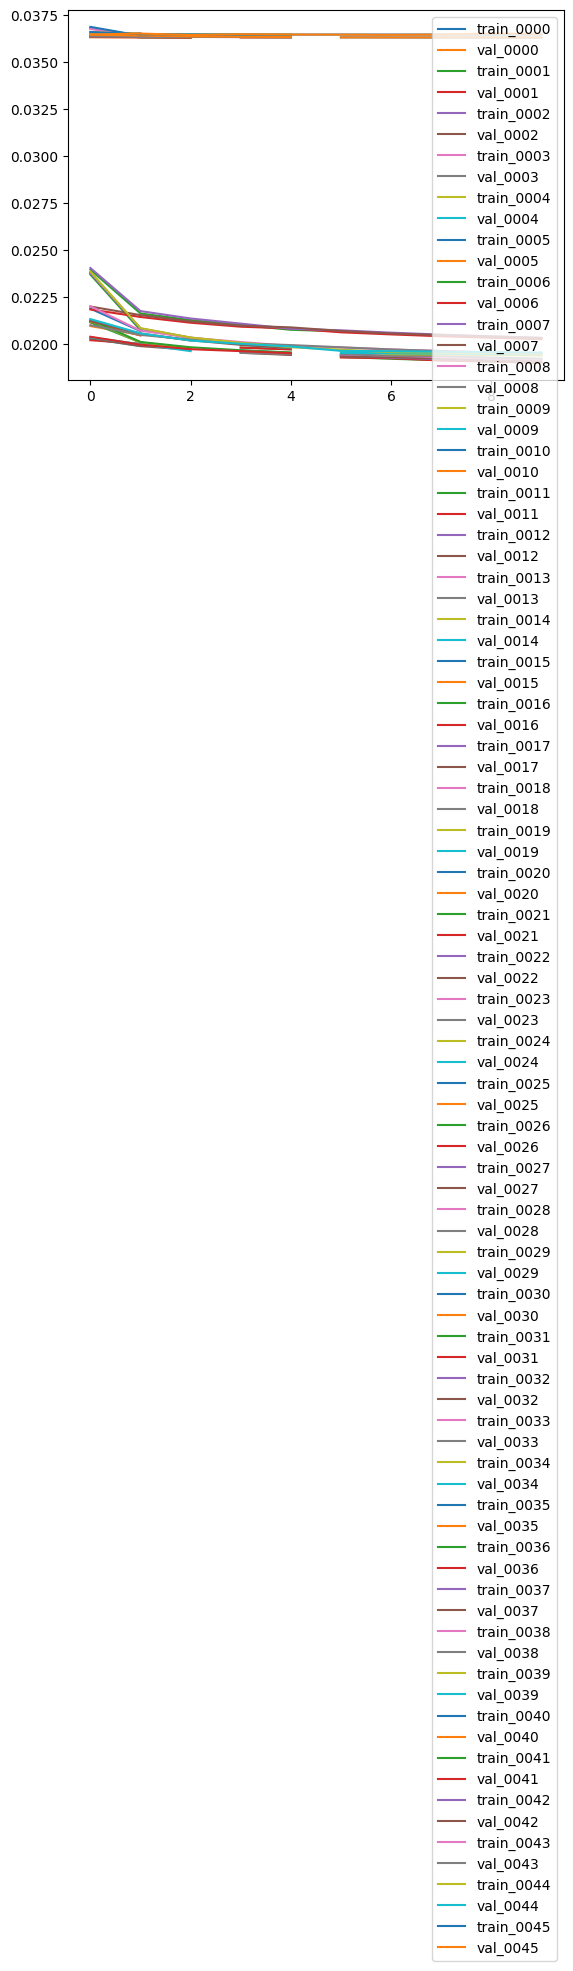

In [4]:
for i in range(46):
    ht_dir = "/home/jchishol/TRecNet/tensorboard_logs/hypertuning/TRecNet_6jets_20230505_152655/"+str(i).zfill(4)
    df_loss = SummaryReader(ht_dir,pivot=True).tensors[["step","epoch_loss"]].dropna()
    train = []
    val = []
    for step in range(len(df_loss)):
        train.append(np.array(df_loss["epoch_loss"])[step][0])
        val.append(np.array(df_loss["epoch_loss"])[step][1])
    plt.plot(df_loss["step"],train,label='train_'+str(i).zfill(4))
    plt.plot(df_loss["step"],val,label='val_'+str(i).zfill(4))
    
plt.legend()



In [5]:
ht_dir = "/home/jchishol/TRecNet/tensorboard_logs/hypertuning/TRecNet_6jets_20230505_152655/"
reader = SummaryReader(ht_dir,extra_columns={'dir_name'})
reader.hparams

,tag,value,dir_name
0,batch_size,10000.000,0000/execution0
1,final_lr_div,1.000,0000/execution0
2,initial_lr,0.001,0000/execution0
3,lr_decay_step,10000.000,0000/execution0
4,lr_power,0.500,0000/execution0
...,...,...,...
225,batch_size,1000.000,0045/execution0
226,final_lr_div,1.000,0045/execution0
227,initial_lr,0.005,0045/execution0
228,lr_decay_step,1000.000,0045/execution0


In [25]:
ht_dir = "/home/jchishol/TRecNet/tensorboard_logs/hypertuning/TRecNet_6jets_20230505_152655/"
reader = SummaryReader(ht_dir,extra_columns={'dir_name'})

remaining_trials = [i for i in range(46)]
train = {}
val = {}
info = {}

stopper = 0
while stopper < len(remaining_trials):
    
    i = remaining_trials[0]
    
    print('On trial '+str(i).zfill(4))
    
    try_train = []
    try_val = []
    
    # Save some info
    inc_trials = [str(i).zfill(4)]
    
    
    # Get the trial on top of the list
    try0 = reader.hparams[reader.hparams['dir_name']==str(i).zfill(4)+'/execution0'].drop('dir_name',axis=1).reset_index(drop=True)
    remaining_trials.remove(i)
    
    
    
    # Add this trials info to the training and testing
    trial_dir = "/home/jchishol/TRecNet/tensorboard_logs/hypertuning/TRecNet_6jets_20230505_152655/"+str(i).zfill(4)
    df_loss = SummaryReader(trial_dir,pivot=True).tensors[["step","epoch_loss"]].dropna()
    for step in range(len(df_loss)):
        try_train.append(np.array(df_loss["epoch_loss"])[step][0])
        try_val.append(np.array(df_loss["epoch_loss"])[step][1])
        

    # Go through all remaining trials and find the ones with the same parameters
    inner_stopper = 0
    inner_remaining_trials = remaining_trials[:]
    while inner_stopper < len(inner_remaining_trials):
    
        j = inner_remaining_trials[0] 
        
         
        
        comp = reader.hparams[reader.hparams['dir_name']==str(j).zfill(4)+'/execution0'].drop('dir_name',axis=1).reset_index(drop=True)
        inner_remaining_trials.remove(j)  
        
        if try0.equals(comp):
            print('match with '+str(j).zfill(4))
            inc_trials.append(str(j).zfill(4))
            remaining_trials.remove(j)
            trial_dir = "/home/jchishol/TRecNet/tensorboard_logs/hypertuning/TRecNet_6jets_20230505_152655/"+str(j).zfill(4)
            df_loss = SummaryReader(trial_dir,pivot=True).tensors[["step","epoch_loss"]].dropna()
            for step in range(len(df_loss)):
                try_train.append(np.array(df_loss["epoch_loss"])[step][0])
                try_val.append(np.array(df_loss["epoch_loss"])[step][1])
                
        
                
                
    # Append to the train and val dictionaries
    train[str(i).zfill(4)] = try_train
    val[str(i).zfill(4)] = try_val
    info[str(i).zfill(4)] = {'Included Trials':inc_trials, try0['tag'][0]:try0['value'][0],try0['tag'][1]:try0['value'][1],try0['tag'][2]:try0['value'][2],try0['tag'][3]:try0['value'][3],try0['tag'][4]:try0['value'][4]}
    
    print(remaining_trials)
    
    
print(train)
print(val)
print(info)


On trial 0000
match with 0014
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
On trial 0001
match with 0012
match with 0017
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
On trial 0002
[3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
On trial 0003
[4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
On trial 0004
match with 0010
match with 0015
match with 0018
[5, 6, 7, 8, 9, 11, 13, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
On trial 0005
match with 0013
[6, 7, 8, 9, 11, 16, 19, 20, 21, 22, 2

In [26]:
pd.DataFrame(info)

,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0033,0034,0035,0036,0037,0041,0042,0043,0044,0045
Included Trials,"[0000, 0014]","[0001, 0012, 0017]",[0002],[0003],"[0004, 0010, 0015, 0018]","[0005, 0013]","[0006, 0011, 0016, 0019]",[0007],[0008],[0009],...,"[0033, 0040]",[0034],[0035],"[0036, 0038]","[0037, 0039]",[0041],[0042],[0043],[0044],[0045]
batch_size,10000.0,10000.0,10000.0,1000.0,1000.0,1000.0,1000.0,10000.0,10000.0,1000.0,...,10000.0,1000.0,10000.0,1000.0,10000.0,10000.0,10000.0,1000.0,10000.0,1000.0
final_lr_div,1.0,1.0,1.0,1.0,1.0,10.0,10.0,1.0,1.0,1.0,...,10.0,1.0,10.0,1.0,10.0,10.0,10.0,10.0,10.0,1.0
initial_lr,0.001,0.001,0.005,0.005,0.001,0.001,0.001,0.005,0.005,0.005,...,0.005,0.005,0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.005
lr_decay_step,10000.0,1000.0,1000.0,10000.0,10000.0,1000.0,10000.0,10000.0,1000.0,10000.0,...,1000.0,1000.0,10000.0,1000.0,10000.0,1000.0,1000.0,1000.0,10000.0,1000.0
lr_power,0.5,0.25,0.5,0.5,0.25,0.25,0.5,0.25,0.25,0.25,...,0.25,0.25,0.25,0.25,0.25,0.25,0.5,0.5,0.5,0.5


<Figure size 800x600 with 0 Axes>

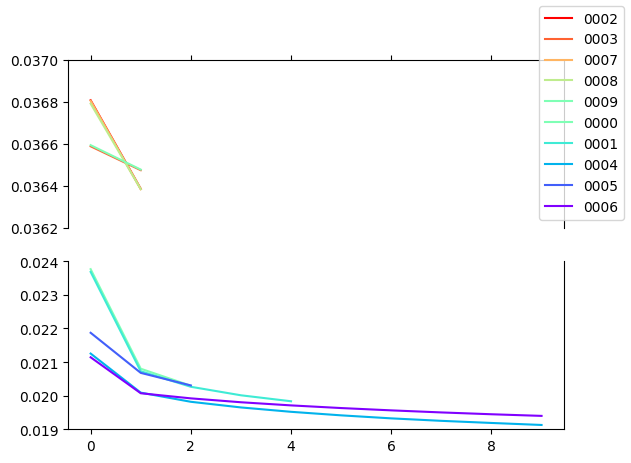

In [87]:
from matplotlib.pyplot import cm


s3 = ['0000','0001','0002','0003','0004','0005','0006','0007','0008','0009']
color1 = iter(cm.get_cmap('rainbow_r')(np.linspace(0, 0.5, int(len(s3)/2))))
color2 = iter(cm.get_cmap('rainbow_r')(np.linspace(0.5, 1, int(len(s3)/2))))

plt.figure('s=3',figsize=(8,6))
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax2.set_ylim(0.019,0.024)
ax1.set_ylim(0.0362,0.037)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()


for key in s3:
    if train[key][0]>0.03:
        c1 = next(color1)
        ax1.plot([i for i in range(len(train[key]))],train[key],label=key,c=c1)
    else:
        c2 = next(color2)
        ax2.plot([i for i in range(len(train[key]))],train[key],label=key,c=c2)
    #plt.plot([i for i in range(len(val[key]))],val[key],'--',c=c)
f.legend()
#f.axvline(1,c='k',linestyle='dotted')
#f.axvline(2,c='k',linestyle='dotted')
#f.axvline(4,c='k',linestyle='dotted')
#f.axvline(9,c='k',linestyle='dotted')
#plt.ylim(0.018,0.024)

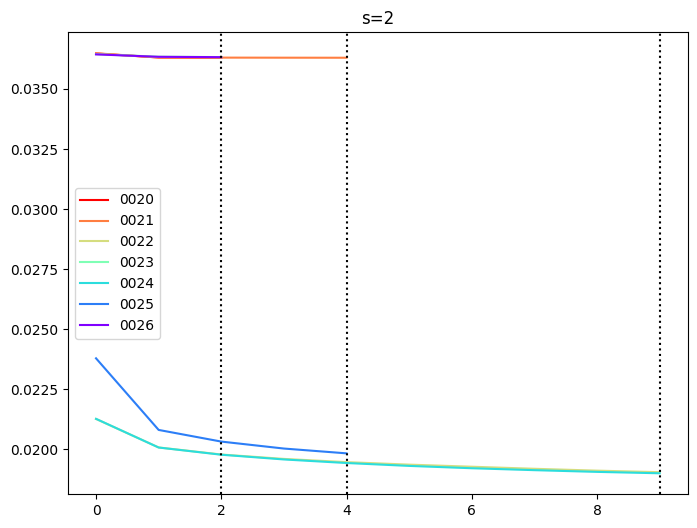

In [86]:
s2 = ['0020','0021','0022','0023','0024','0025','0026']
color = iter(cm.get_cmap('rainbow_r')(np.linspace(0, 1, len(s2))))

plt.figure('s=2',figsize=(8,6))
plt.title('s=2')
for key in s2:
    c = next(color)
    plt.plot([i for i in range(len(train[key]))],train[key],label=key,c=c)
    #plt.plot([i for i in range(len(val[key]))],val[key],'--',c=c)
plt.legend()
plt.axvline(2,c='k',linestyle='dotted')
plt.axvline(4,c='k',linestyle='dotted')
plt.axvline(9,c='k',linestyle='dotted')
#plt.ylim(0.018,0.024)
#plt.yscale('log')

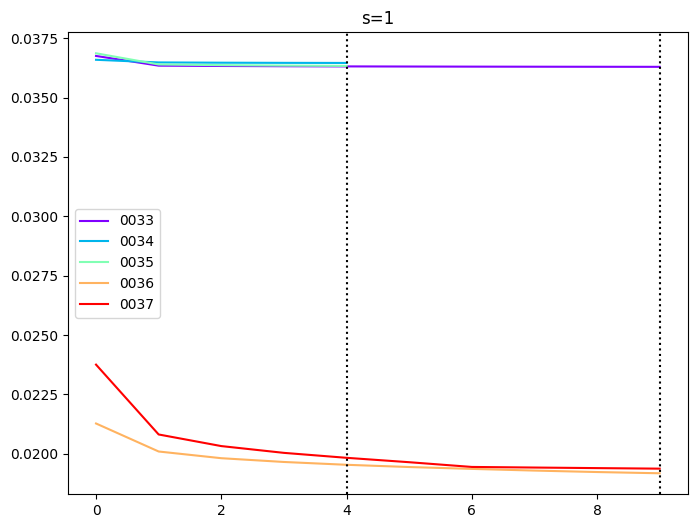

In [54]:
s1 = ['0033','0034','0035','0036','0037']
color = iter(cm.rainbow(np.linspace(0, 1, len(s1))))

plt.figure('s=1',figsize=(8,6))
plt.title('s=1')
for key in s1:
    c = next(color)
    plt.plot([i for i in range(len(train[key]))],train[key],label=key,c=c)
    #plt.plot([i for i in range(len(val[key]))],val[key],'--',c=c)
plt.legend()
plt.axvline(4,c='k',linestyle='dotted')
plt.axvline(9,c='k',linestyle='dotted')
#plt.ylim(0.018,0.024)
#plt.yscale('log')

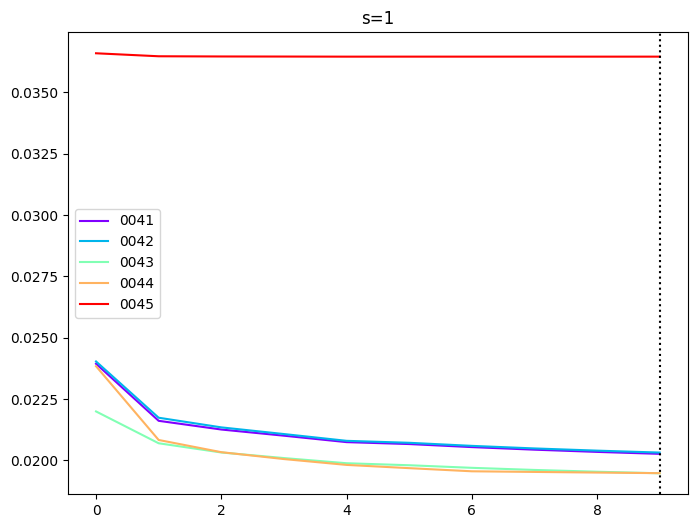

In [53]:
s1 = ['0041','0042','0043','0044','0045']
color = iter(cm.rainbow(np.linspace(0, 1, len(s1))))

plt.figure('s=1',figsize=(8,6))
plt.title('s=1')
for key in s1:
    c = next(color)
    plt.plot([i for i in range(len(train[key]))],train[key],label=key,c=c)
    #plt.plot([i for i in range(len(val[key]))],val[key],'--',c=c)
plt.legend()
plt.axvline(9,c='k',linestyle='dotted')
#plt.ylim(0.018,0.024)
#plt.yscale('log')

In [ ]:
ses = ['0004','0024','0036','0043']
color = iter(cm.rainbow(np.linspace(0, 1, len(s1))))

plt.figure('best',figsize=(8,6))
s=3
for key in ses:
    c = next(color)
    plt.plot([i for i in range(len(train[key]))],train[key],label=key,c=c)
    #plt.plot([i for i in range(len(val[key]))],val[key],'--',c=c)
plt.legend()
plt.axvline(9,c='k',linestyle='dotted')
#plt.ylim(0.018,0.024)
#plt.yscale('log')